In [2]:
import plotly_express as px
import pandas as pd 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
ptl_df = pd.read_csv(r'C:\OMDENA\Project\sao-paulo-chapter-passenger-demand\src\tasks\task_2_eda_dashboards\data\alllines_ptl_complete.csv')
ptl_df['year_month'] = pd.to_datetime(ptl_df['year_month'])

ptl_df


,year_month,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
0,2018-08-01,3,38679000.0,1440000.0,884000.0,504000.0,1483000.0
1,2018-08-01,1,37775000.0,1420000.0,832000.0,446000.0,1466000.0
2,2018-08-01,15,516000.0,22000.0,NaN,2000.0,23000.0
3,2018-08-01,2,18164000.0,701000.0,318000.0,194000.0,723000.0
4,2018-08-01,5,7220000.0,309000.0,176000.0,85000.0,322000.0
...,...,...,...,...,...,...,...
337,2023-04-01,2,14544000.0,649000.0,299000.0,189000.0,671000.0
338,2023-04-01,4,15070570.0,661450.0,338300.0,201580.0,701710.0
339,2023-04-01,5,11792220.0,510810.0,282420.0,160710.0,527250.0
340,2023-04-01,1,25545000.0,1091000.0,639000.0,375000.0,1130000.0


In [4]:
line_colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'yellow',
    5: 'purple',
    15: 'silver'
}

In [5]:
# Plot the data with each line having its own color
fig = px.line(ptl_df, x='year_month', y='total', color='line', line_group='line',
              color_discrete_map=line_colors)

# Add axis labels and title
fig.update_layout(
    xaxis_title='Year-Month',
    yaxis_title='Total',
    title='Total by Line throughout the Year'
)

# Display the plot
fig.show()


In [6]:
correlation_matrix = ptl_df.pivot_table(index='year_month', columns='line', values='total').corr()

# Display the correlation matrix
print(correlation_matrix)

line        1         2         3         4         5         15
line                                                            
1     1.000000  0.984480  0.998753  0.985914  0.814021 -0.053346
2     0.984480  1.000000  0.979047  0.994336  0.886834  0.127829
3     0.998753  0.979047  1.000000  0.981697  0.799516 -0.079052
4     0.985914  0.994336  0.981697  1.000000  0.847212  0.088042
5     0.814021  0.886834  0.799516  0.847212  1.000000  0.493728
15   -0.053346  0.127829 -0.079052  0.088042  0.493728  1.000000


In [7]:
fig = px.violin(ptl_df, x='line', y='total', color='line',
                violinmode='overlay', box=True, points='all',
                color_discrete_map=line_colors)

# Add axis labels and title
fig.update_layout(
    xaxis_title='Line',
    yaxis_title='Total',
    title='Distribution of Passenger Demand for Different Lines'
)

# Remove space for lines 6 to 14
fig.update_xaxes(categoryorder='array', categoryarray=[1, 2, 3, 4, 5, 15])

# Display the plot
fig.show()

In [8]:
# Calculate the average total for each line for every month
avg_monthly_line = ptl_df.groupby(['line', ptl_df['year_month'].dt.month])['total'].mean().reset_index()

# Define the order of lines and corresponding colors
line_order = [1, 2, 3, 4, 5, 15]
# Create a bar trace for each line
traces = []
for line in line_order:
    # Filter the data for the current line
    line_data = avg_monthly_line[avg_monthly_line['line'] == line]
    
    # Create a bar trace for the line
    trace = go.Bar(
        x=line_data['year_month'],
        y=line_data['total'],
        name=f'Line {line}',
        marker=dict(color=line_colors[line]),
    )
    
    # Add the trace to the list of traces
    traces.append(trace)

# Create the layout for the graph
layout = go.Layout(
    barmode='group',
    title='Average Passenger Demand by Line and Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Average Passenger Demand'),
)

# Create the figure and plot the traces
fig = go.Figure(data=traces, layout=layout)

# Display the plot
fig.show()

In [9]:
ptl_df

,year_month,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
0,2018-08-01,3,38679000.0,1440000.0,884000.0,504000.0,1483000.0
1,2018-08-01,1,37775000.0,1420000.0,832000.0,446000.0,1466000.0
2,2018-08-01,15,516000.0,22000.0,NaN,2000.0,23000.0
3,2018-08-01,2,18164000.0,701000.0,318000.0,194000.0,723000.0
4,2018-08-01,5,7220000.0,309000.0,176000.0,85000.0,322000.0
...,...,...,...,...,...,...,...
337,2023-04-01,2,14544000.0,649000.0,299000.0,189000.0,671000.0
338,2023-04-01,4,15070570.0,661450.0,338300.0,201580.0,701710.0
339,2023-04-01,5,11792220.0,510810.0,282420.0,160710.0,527250.0
340,2023-04-01,1,25545000.0,1091000.0,639000.0,375000.0,1130000.0


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
data = ptl_df


In [12]:

# Sample data


# Convert the year_month column to datetime format
data['year_month'] = pd.to_datetime(data['year_month'])

# Create a list of unique lines
lines = data['line'].unique()

# Create a list of colors for each line
line_colors = {
    '1': 'Blue',
    '2': 'Green',
    '3': 'Red',
    '4': 'Yellow',
    '5': 'Purple',
    '15': 'Silver'
}


# Create a list to store each line trace with seasonal component
traces = []

# Iterate over each line
for i, line in enumerate(lines):
    # Filter the data for the current line
    line_data = data[data['line'] == line]

    # Drop rows with missing values in the 'total' column
    line_data = line_data.dropna(subset=['total'])

    # Perform seasonal decomposition
    result = seasonal_decompose(line_data['total'], model='additive', period=12)

    # Get the seasonal component
    seasonal = result.seasonal

    # Create a scatter trace for the seasonal component
    trace = go.Scatter(
        x=line_data['year_month'],
        y=seasonal,
        name=f'Line {line}',
        mode='markers',
        marker=dict(color=line_colors[f'{line}']),  # Assign a color to the scatter points
    )
    traces.append(trace)

# Create the layout for the graph
layout = go.Layout(title='Seasonal Subseries Plot', xaxis=dict(title='Month'), yaxis=dict(title='Seasonal Component'))

# Create the figure object
fig = go.Figure(data=traces, layout=layout)

# Display the graph
fig.show()








Seasonal Decomposition For a given line 

In [13]:
line = 5
line_data = ptl_df[ptl_df['line']==line]
line_data
result = seasonal_decompose(line_data['total'], model='additive', period=12)
seasonal = result.seasonal
# Create a scatter trace for the seasonal component
trace = go.Scatter(
    x=line_data['year_month'],
    y=seasonal,
    mode='lines',
    name='Seasonal Component'
)
# Create the layout for the graph
layout = go.Layout(title='Seasonal Decomposition of avg Month', xaxis=dict(title='Year-Month'), yaxis=dict(title='Seasonal Component'))

# Create the figure object
fig = go.Figure(data=trace, layout=layout)

# Display the graph
fig.show()

ACF AND PACF PLOTS for given line 

[Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)'),
 Text(0.5, 0, 'Lag'),
 Text(0, 0.5, 'Partial Autocorrelation')]

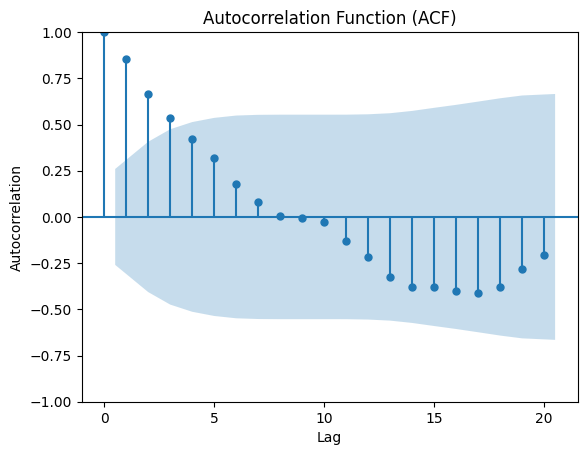

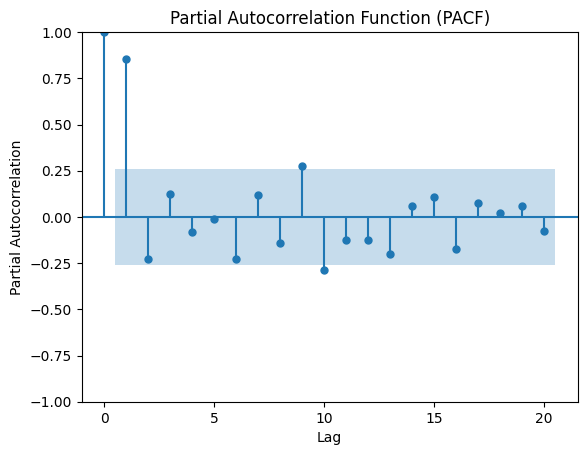

In [14]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Create ACF plot
acf_fig, ax = plt.subplots()
plot_acf(line_data['total'], ax=ax, lags=20)

# Update the layout
ax.set(title='Autocorrelation Function (ACF)', xlabel='Lag', ylabel='Autocorrelation')

# Convert ACF plot to Plotly format
# acf_plotly = go.Figure(data=go.Scatter(x=ax.get_xticks(), y=ax.lines[0].get_ydata(), mode='lines'))

# Display the ACF plot
# acf_plotly.show()

# Create PACF plot
pacf_fig, ax = plt.subplots()
plot_pacf(line_data['total'], ax=ax, lags=20)
line_data
# Update the layout
ax.set(title='Partial Autocorrelation Function (PACF)', xlabel='Lag', ylabel='Partial Autocorrelation')

In [15]:
avg_data = data.groupby('year_month')['total'].mean().reset_index()

# Print the average data
print(avg_data)

   year_month         total
0  2018-08-01  2.053300e+07
1  2018-09-01  1.866183e+07
2  2018-10-01  2.086433e+07
3  2018-11-01  1.943600e+07
4  2018-12-01  1.898467e+07
5  2019-01-01  1.802817e+07
6  2019-02-01  1.968867e+07
7  2019-03-01  2.088983e+07
8  2019-04-01  2.159450e+07
9  2019-05-01  2.238817e+07
10 2019-06-01  1.917000e+07
11 2019-07-01  1.988017e+07
12 2019-08-01  2.213083e+07
13 2019-09-01  2.143300e+07
14 2019-10-01  2.336350e+07
15 2019-11-01  2.096767e+07
16 2019-12-01  1.958350e+07
17 2020-01-01  1.910617e+07
18 2020-02-01  1.951750e+07
19 2020-03-01  1.694500e+07
20 2020-04-01  5.215800e+06
21 2020-05-01  5.731800e+06
22 2020-06-01  6.317667e+06
23 2020-07-01  8.133333e+06
24 2020-08-01  8.877167e+06
25 2020-09-01  9.698167e+06
26 2020-10-01  1.075617e+07
27 2020-11-01  1.082367e+07
28 2020-12-01  1.084917e+07
29 2021-01-01  9.811833e+06
30 2021-02-01  1.015733e+07
31 2021-03-01  8.689833e+06
32 2021-04-01  8.086667e+06
33 2021-05-01  9.889500e+06
34 2021-06-01  1.050

Seasonal decompositon for Total

In [16]:
result = seasonal_decompose(avg_data['total'], model='additive', period=12)
seasonal = result.seasonal
# Create a scatter trace for the seasonal component
trace = go.Scatter(
    x=avg_data['year_month'],
    y=seasonal,
    mode='lines',
    name='Seasonal Component'
)
# Create the layout for the graph
layout = go.Layout(title='Seasonal Decomposition of avg Month', xaxis=dict(title='Year-Month'), yaxis=dict(title='Seasonal Component'))

# Create the figure object
fig = go.Figure(data=trace, layout=layout)

# Display the graph
fig.show()

ACF and PACF plots for total 

[Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)'),
 Text(0.5, 0, 'Lag'),
 Text(0, 0.5, 'Partial Autocorrelation')]

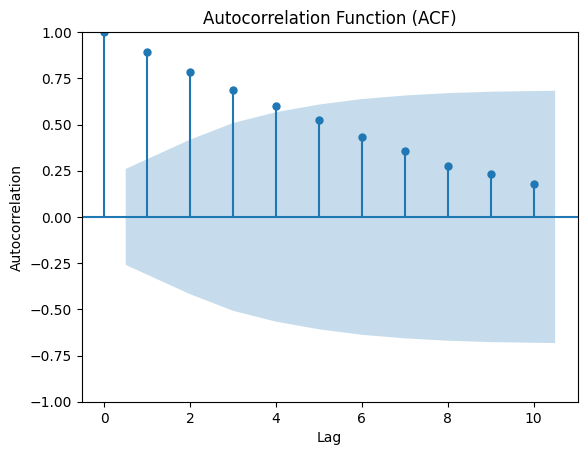

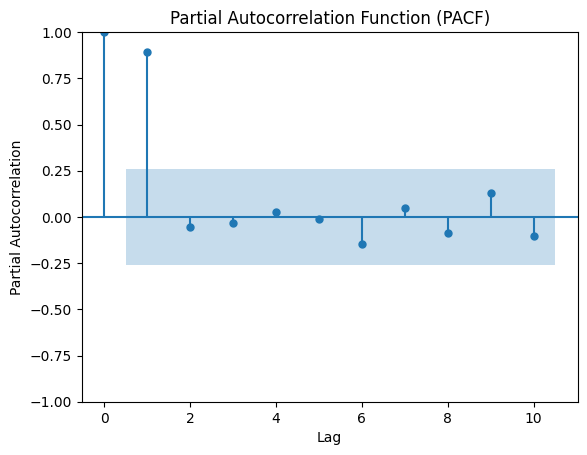

In [17]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Create ACF plot
acf_fig, ax = plt.subplots()
plot_acf(avg_data['total'], ax=ax, lags=10)

# Update the layout
ax.set(title='Autocorrelation Function (ACF)', xlabel='Lag', ylabel='Autocorrelation')

# Convert ACF plot to Plotly format
# acf_plotly = go.Figure(data=go.Scatter(x=ax.get_xticks(), y=ax.lines[0].get_ydata(), mode='lines'))

# Display the ACF plot
# acf_plotly.show()

# Create PACF plot
pacf_fig, ax = plt.subplots()
plot_pacf(avg_data['total'], ax=ax, lags=10)

# Update the layout
ax.set(title='Partial Autocorrelation Function (PACF)', xlabel='Lag', ylabel='Partial Autocorrelation')

# Convert PACF plot to Plotly format
# pacf_plotly = go.Figure(data=go.Scatter(x=ax.get_xticks(), y=ax.lines[0].get_ydata(), mode='lines'))

# Display the PACF plot
# pacf_plotly.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(avg_data['total'],autolag = 'AIC')
print(f"Adf : {dftest[0]} \nP-value : {dftest[1]}\nNo of Obv used for ADF reg and critical values : {dftest[2]}\n{dftest[4]}")

Adf : -1.8586634107788234 
P-value : 0.3517498608270538
No of Obv used for ADF reg and critical values : 0
{'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}


We should use AR model with order 1 

In [19]:
# avg_data.set_index('year_month', inplace=True)

AR model 

In [31]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import TimeSeriesSplit

# Set the index to the 'year_month' column
# avg_data.set_index('year_month', inplace=True)

# Define the number of splits
n_splits = 7

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Perform the split
for train_index, test_index in tscv.split(avg_data):
    train_data = avg_data.iloc[train_index]
    test_data = avg_data.iloc[test_index]

# Fit AR model
model = AutoReg(train_data['total'],lags=7)
ar_model = model.fit()

# Predict the next value
next_value = pd.DataFrame(ar_model.predict(start=0, end=len(avg_data)),columns=['total'])
next_value
# Append the predicted value to the DataFrame
# predicted_data = train_data.append(pd.DataFrame({'year_month': pd.to_datetime(['2023-05-01']), 'total': next_value}))

# Plot the actual and predicted data
fig = go.Figure()
fig.add_trace(go.Scatter(x=avg_data.index, y=avg_data['total'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=next_value.index, y=next_value['total'], mode='lines', name='Predicted'))
fig.update_layout(title='AR Model - Actual vs Predicted', xaxis=dict(title='Year-Month'), yaxis=dict(title='Total'))

# Show the plot
fig.show()